In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1.Load the Dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#This displays top 5 rows in the dataset

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.Do all the necessary pre-processing steps

In [4]:
#This describes the stat behind the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking shape of the data

data.shape

(891, 12)

In [6]:
#Checking Datatypes

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Missing Values Handling

In [7]:
#Checking null or missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#To fill the missing values, we can use mean or median.
#For numerical column we can use mean or median

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

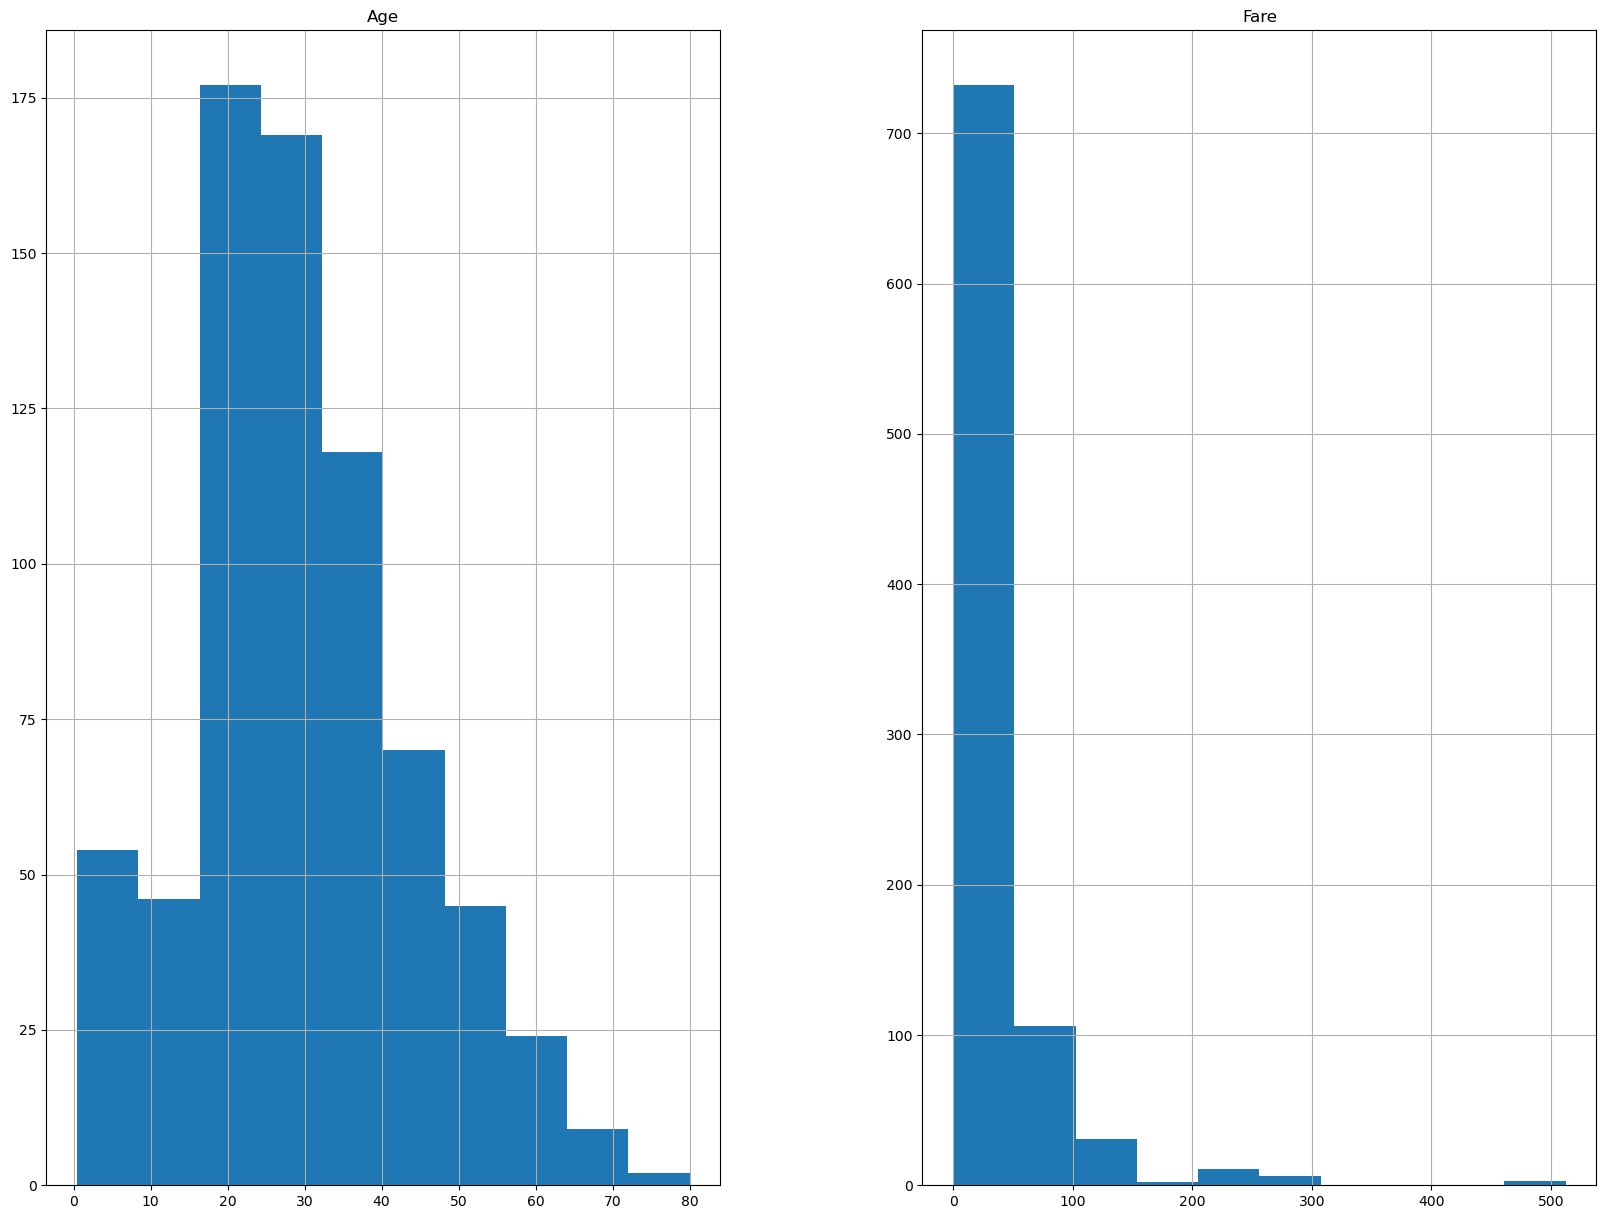

In [9]:
#Checking skewness of the data

freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
#Age plot is right skewed

In [11]:
#Replacing missing values of Age column with median as its having numeric values.

x1=data['Age'].median()
x1

28.0

In [12]:
#Filling the missing value
data['Age'].fillna(x1,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
#Replacing null values of Cabin and Embarked with mode as its a categorical value

data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)
data.Cabin.fillna(data.Cabin.mode()[0],inplace=True)

In [14]:
#As cabin column contain more null values than non null values, we are dropping that column

data.drop(['Cabin'],axis=1,inplace=True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
data.shape

(891, 11)

In [18]:
#Checking unique values in the target column

data['Survived'].unique()

array([0, 1], dtype=int64)

In [19]:
#Checking how many unique values in the target column

data['Survived'].nunique()

2

In [20]:
#Checking for duplicates

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [21]:
data.drop_duplicates(inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
#Dropping unnecessary columns

data = data.drop(['PassengerId','Name','Ticket','Embarked'],axis=1)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [24]:
#Convertinhg the categorical column into numerical column 

#One Hot Encoding

data=pd.get_dummies(data)

In [25]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [26]:
#Again checking for null values

data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

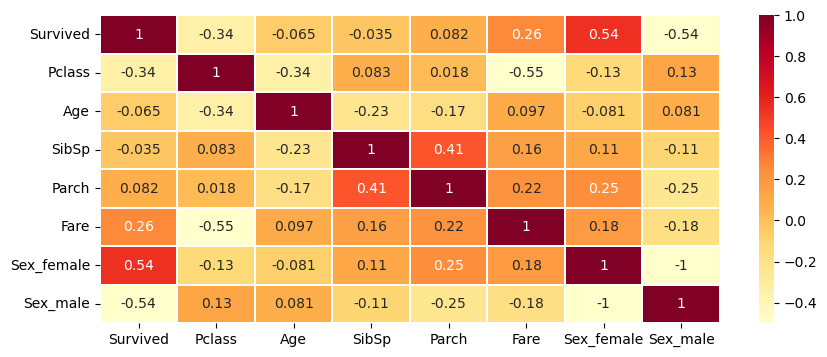

In [27]:
#Checking correlation between independent and dependent variable

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.5,vmax=1,linewidth=0.3,cmap='YlOrRd')
plt.show()

# Finding Outliers

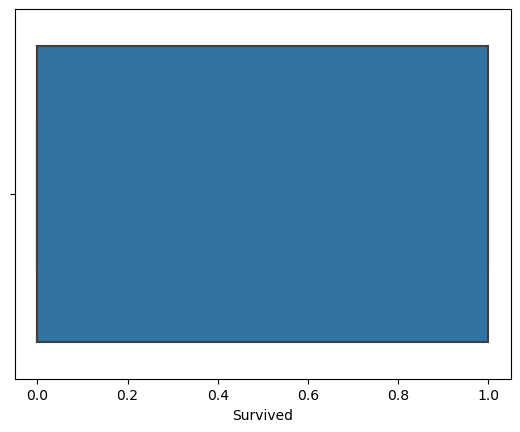

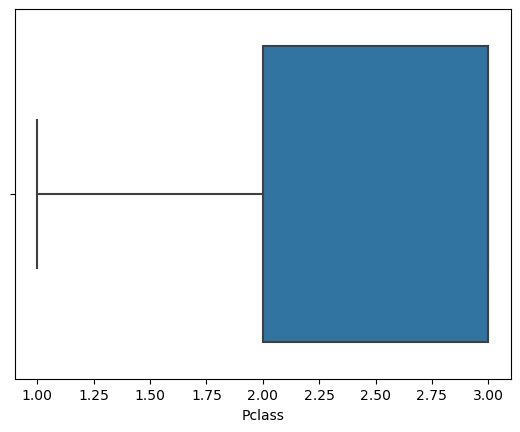

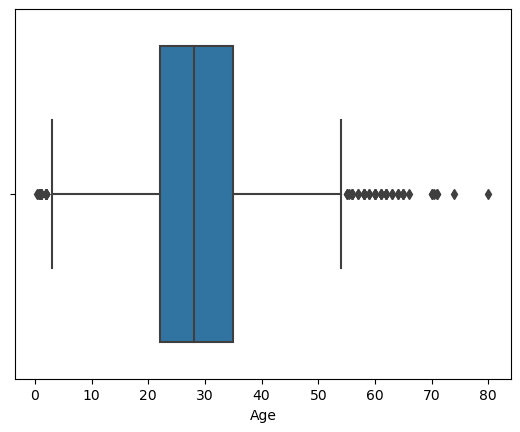

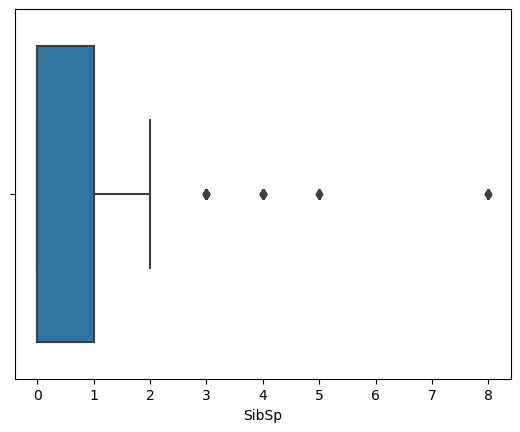

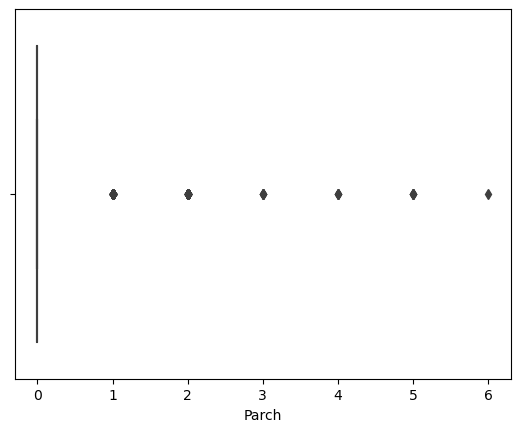

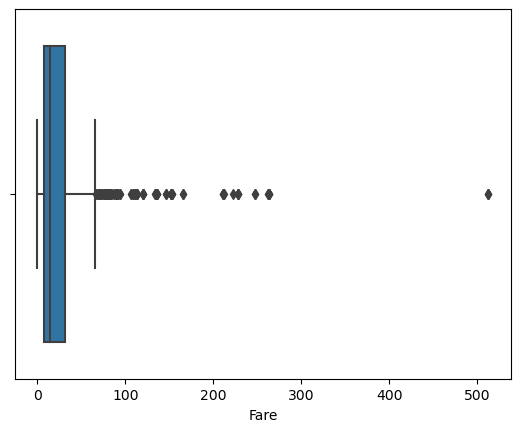

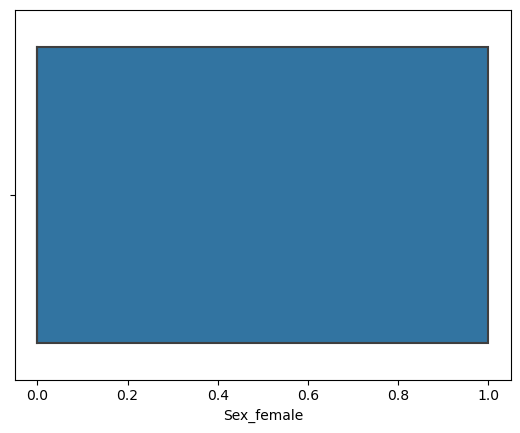

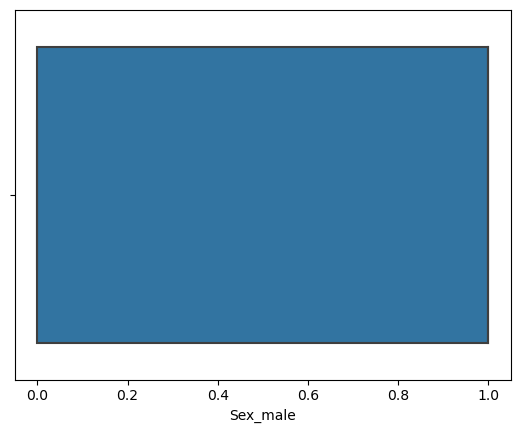

In [28]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [29]:
#Columns having outliers

#1.Age
#2.SibSp
#3.Parch
#4.Fare

# Managing Outliers

1.Age

In [30]:
IQR=stats.iqr(data.Age,interpolation='midpoint')
IQR

13.0

In [31]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.5, 54.5)

In [32]:
data.loc[data.Age<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
7,0,3,2.00,3,1,21.0750,0,1
16,0,3,2.00,4,1,29.1250,0,1
78,1,2,0.83,0,2,29.0000,0,1
119,0,3,2.00,4,2,31.2750,1,0
164,0,3,1.00,4,1,39.6875,0,1
172,1,3,1.00,1,1,11.1333,1,0
183,1,2,1.00,2,1,39.0000,0,1
205,0,3,2.00,0,1,10.4625,1,0
297,0,1,2.00,1,2,151.5500,1,0
305,1,1,0.92,1,2,151.5500,0,1


In [33]:
data.loc[data.Age>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
11,1,1,58.0,0,0,26.5500,1,0
15,1,2,55.0,0,0,16.0000,1,0
33,0,2,66.0,0,0,10.5000,0,1
54,0,1,65.0,0,1,61.9792,0,1
94,0,3,59.0,0,0,7.2500,0,1
96,0,1,71.0,0,0,34.6542,0,1
116,0,3,70.5,0,0,7.7500,0,1
152,0,3,55.5,0,0,8.0500,0,1
170,0,1,61.0,0,0,33.5000,0,1
174,0,1,56.0,0,0,30.6958,0,1


Removing  Outliers

In [34]:
data.loc[data['Age']>max_limit,'Age']=np.median(data.Age)

In [35]:
data.loc[data.Age>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [36]:
data.loc[data['Age']<min_limit,'Age']=np.median(data.Age)

In [37]:
data.loc[data.Age<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


2.SibSp

In [38]:
IQR=stats.iqr(data.SibSp,interpolation='midpoint')
IQR

1.0

In [39]:
Q1=data.SibSp.quantile(0.25)
Q3=data.SibSp.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.5, 2.5)

In [40]:
data.loc[data.SibSp<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [41]:
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
7,0,3,28.0,3,1,21.0750,0,1
16,0,3,28.0,4,1,29.1250,0,1
24,0,3,8.0,3,1,21.0750,1,0
27,0,1,19.0,3,2,263.0000,0,1
50,0,3,7.0,4,1,39.6875,0,1
59,0,3,11.0,5,2,46.9000,0,1
63,0,3,4.0,3,2,27.9000,0,1
68,1,3,17.0,4,2,7.9250,1,0
71,0,3,16.0,5,2,46.9000,1,0
85,1,3,33.0,3,0,15.8500,1,0


Removing Outliers

In [42]:
data.loc[data['SibSp']>max_limit,'SibSp']=np.median(data.SibSp)
data.loc[data['SibSp']<min_limit,'SibSp']=np.median(data.SibSp)

In [43]:
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [44]:
data.loc[data.SibSp<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


3.Parch

In [45]:
IQR=stats.iqr(data.Parch,interpolation='midpoint')
IQR

0.0

In [46]:
Q1=data.Parch.quantile(0.25)
Q3=data.Parch.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 0.0)

In [47]:
data.loc[data.Parch<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [48]:
data.loc[data.Parch>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
7,0,3,28.0,0,1,21.0750,0,1
8,1,3,27.0,0,2,11.1333,1,0
10,1,3,4.0,1,1,16.7000,1,0
13,0,3,39.0,1,5,31.2750,0,1
16,0,3,28.0,0,1,29.1250,0,1
...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,1,0
879,1,1,28.0,0,1,83.1583,1,0
880,1,2,25.0,0,1,26.0000,1,0
885,0,3,39.0,0,5,29.1250,1,0


Removing Outliers

In [49]:
data.loc[data['Parch']>max_limit,'Parch']=np.median(data.Parch)
data.loc[data['Parch']<min_limit,'Parch']=np.median(data.Parch)

In [50]:
data.loc[data.Parch<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [51]:
data.loc[data.Parch>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


4.Fare

In [52]:
IQR=stats.iqr(data.Fare,interpolation='midpoint')
IQR

23.0896

In [53]:
Q1=data.Fare.quantile(0.25)
Q3=data.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [54]:
data.loc[data.Fare<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [55]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
1,1,1,38.0,1,0,71.2833,1,0
27,0,1,19.0,0,0,263.0000,0,1
31,1,1,28.0,1,0,146.5208,1,0
34,0,1,28.0,1,0,82.1708,0,1
52,1,1,49.0,1,0,76.7292,1,0
...,...,...,...,...,...,...,...,...
846,0,3,28.0,0,0,69.5500,0,1
849,1,1,28.0,1,0,89.1042,1,0
856,1,1,45.0,1,0,164.8667,1,0
863,0,3,28.0,0,0,69.5500,1,0


Removing Outliers

In [56]:
data.loc[data['Fare']>max_limit,'Fare']=np.median(data.Fare)
data.loc[data['Fare']<min_limit,'Fare']=np.median(data.Fare)

In [57]:
data.loc[data.Fare<min_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


In [58]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male


After Removing Outlier, Plotting the boxplot

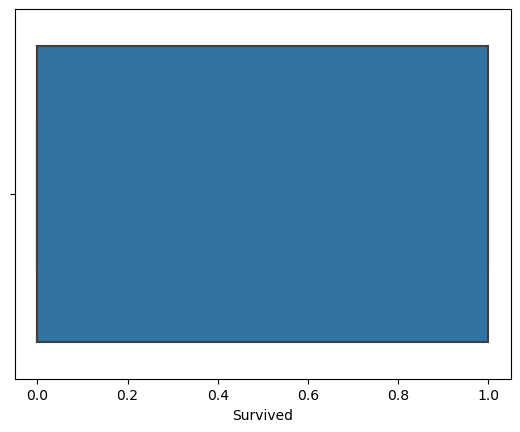

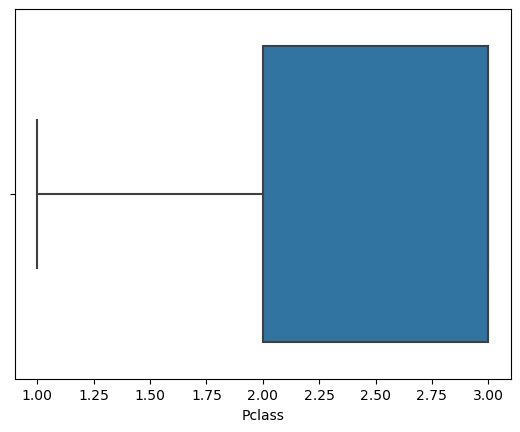

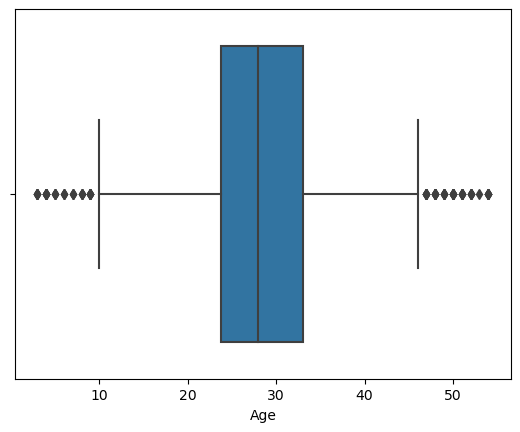

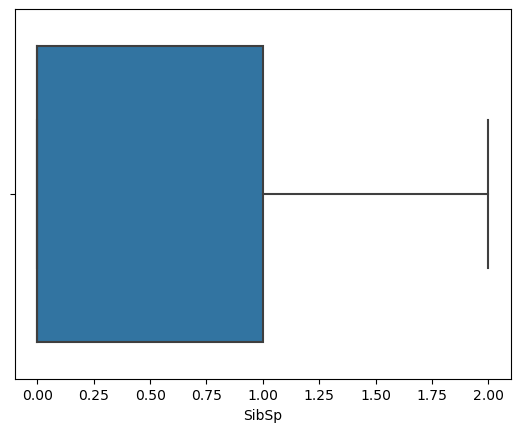

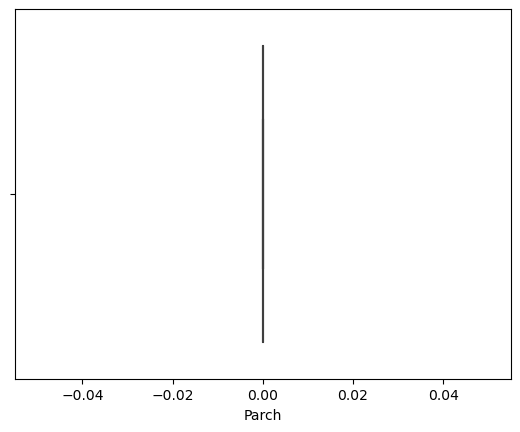

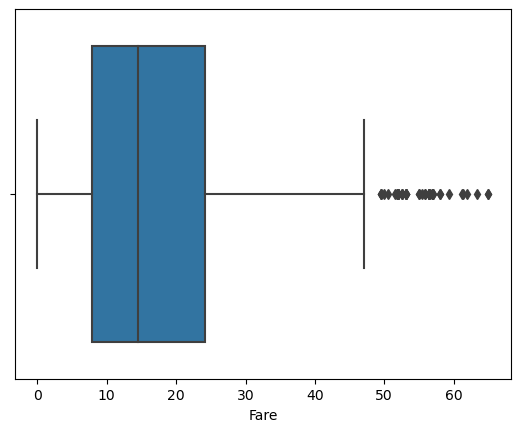

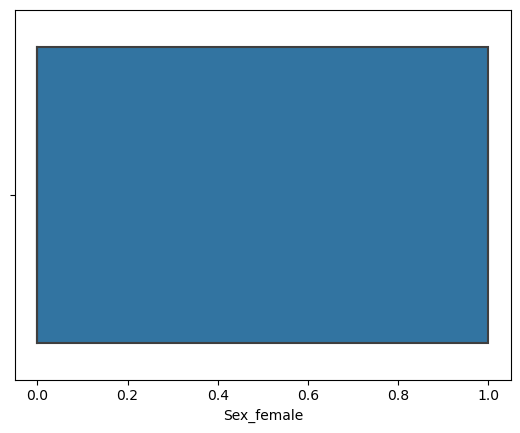

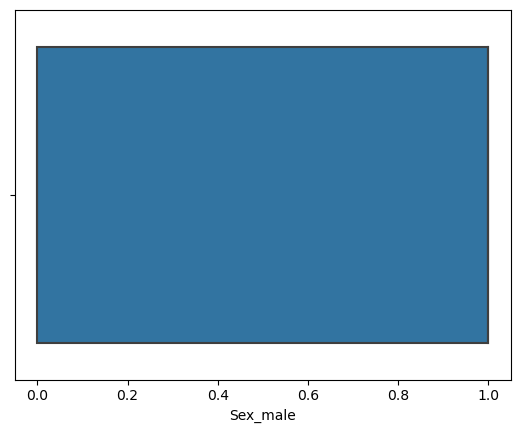

In [59]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [60]:
#Taking x as the independent variable and y as the dependent variable and dropping the target column

y=data['Survived']
x=data.drop(['Survived'],axis=1)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [61]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,14.4542,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,0,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


# Scaling And Normalization

Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,14.4542,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [64]:
df=pd.DataFrame(data)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,14.4542,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,28.0,1,0,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [65]:
#Creating Instance
scaler=MinMaxScaler()
#Fitting the model

df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,1.0,0.372549,0.5,0.0,0.111538,0.0,1.0
1,1.0,0.0,0.686275,0.5,0.0,0.222372,1.0,0.0
2,1.0,1.0,0.450980,0.0,0.0,0.121923,1.0,0.0
3,1.0,0.0,0.627451,0.5,0.0,0.816923,1.0,0.0
4,0.0,1.0,0.627451,0.0,0.0,0.123846,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.470588,0.0,0.0,0.200000,0.0,1.0
887,1.0,0.0,0.313725,0.0,0.0,0.461538,1.0,0.0
888,0.0,1.0,0.490196,0.5,0.0,0.360769,1.0,0.0
889,1.0,0.0,0.450980,0.0,0.0,0.461538,0.0,1.0


Normalize

In [66]:
from sklearn import preprocessing

In [67]:
df=preprocessing.normalize(data)
norm_df=pd.DataFrame(df,columns=data.columns)
norm_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.000000,0.128205,0.940169,0.042735,0.0,0.309828,0.000000,0.042735
1,0.024567,0.024567,0.933539,0.024567,0.0,0.355094,0.024567,0.000000
2,0.036520,0.109559,0.949509,0.000000,0.0,0.289418,0.036520,0.000000
3,0.015716,0.015716,0.550066,0.015716,0.0,0.834529,0.015716,0.000000
4,0.000000,0.083211,0.970799,0.000000,0.0,0.223284,0.000000,0.027737
...,...,...,...,...,...,...,...,...
886,0.000000,0.066556,0.898504,0.000000,0.0,0.432613,0.000000,0.033278
887,0.028127,0.028127,0.534417,0.000000,0.0,0.843816,0.028127,0.000000
888,0.000000,0.081804,0.763506,0.027268,0.0,0.639437,0.027268,0.000000
889,0.025166,0.025166,0.654308,0.000000,0.0,0.754971,0.000000,0.025166


In [68]:
data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

# Hold Out Technique

In [69]:
#Split the data for train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 3.Create KNN and SVM models

# 1.k-NN

In [70]:
#Importing KNN classifier

from sklearn.neighbors import KNeighborsClassifier


In [71]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [72]:
#Creating metric

metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [73]:
metric_k

[0.6759776536312849,
 0.6983240223463687,
 0.7094972067039106,
 0.7039106145251397,
 0.7094972067039106,
 0.6871508379888268,
 0.7039106145251397,
 0.6871508379888268,
 0.659217877094972,
 0.659217877094972,
 0.664804469273743,
 0.659217877094972]

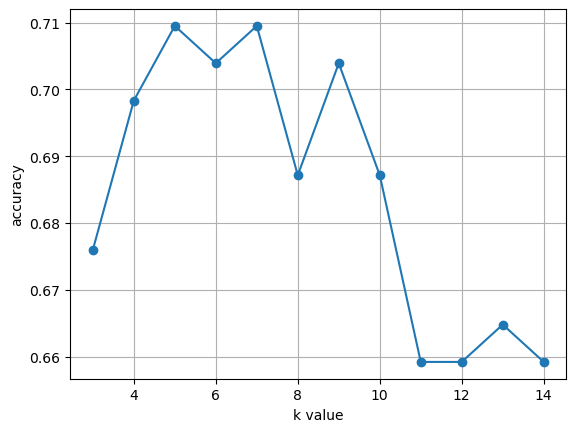

In [74]:
#Plotting the values 

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [112]:
#Accuracy is more in 7

#Choosing k as 7


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred_knn=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)

C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [113]:
print('Accuracy=',accuracy_score(y_test,y_pred_knn))
print('Precision=',precision_score(y_test,y_pred_knn))
print('Recall=',recall_score(y_test,y_pred_knn))
print('F1 score=',f1_score(y_test,y_pred_knn))

Accuracy= 0.7094972067039106
Precision= 0.6774193548387096
Recall= 0.5675675675675675
F1 score= 0.6176470588235294


In [114]:
#Another way to get the accuracy score

KNN_model=classifier.fit(x_train,y_train)

In [115]:
score_KNN=KNN_model.score(x_test,y_test)
score_KNN

C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7094972067039106

# K-Fold Cross Validation

In [116]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

In [117]:
for train_index, test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [118]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(KNN_model,x,y,cv= kfold_validator)

C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [119]:
cv_score

array([0.71111111, 0.6741573 , 0.6741573 , 0.73033708, 0.76404494,
       0.71910112, 0.71910112, 0.75280899, 0.82022472, 0.79775281])

In [120]:
#Taking average of cv score

np.mean(cv_score)

0.7362796504369539

# Stratified k-fold Cross validation

In [121]:
from sklearn.model_selection import StratifiedKFold

In [122]:
skfold_validator=StratifiedKFold(n_splits=10)

In [123]:
#Giving entire data for validation and check what columns are taking for validation and training

for train_index,test_index in skfold_validator.split(x,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [124]:
skcv_score=cross_val_score(KNN_model,x,y,cv=skfold_validator)

skcv_score

C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gopika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.7       , 0.68539326, 0.71910112, 0.74157303, 0.7752809 ,
       0.70786517, 0.74157303, 0.7752809 , 0.78651685, 0.79775281])

In [125]:
#Taking average of skcv score

np.mean(skcv_score)

0.7430337078651685

# SVM

In [126]:
#Adding kernels

from sklearn.svm import SVC
svmclf=SVC(kernel='linear')

#Fitting the data

svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [127]:
#Predicting the models

y_pred_svm=svmclf.predict(x_test)

In [128]:
#Checking the accuracy

from sklearn.metrics import accuracy_score,confusion_matrix

In [129]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.7821229050279329


In [130]:
print('confusion_matrix=',confusion_matrix(y_test,y_pred_svm))

confusion_matrix= [[88 17]
 [22 52]]


# RBF

In [131]:
#Adding kernels

from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
SVM_model=svmclf.fit(x_train,y_train)
SVM_model

SVC()

In [132]:
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.6145251396648045


In [133]:
#Another way to find accuracy

SVM_score=SVM_model.score(x_test,y_test)

In [134]:
SVM_score

0.6145251396648045

# Polynomial

In [135]:
#Adding kernels

from sklearn.svm import SVC
svmclf=SVC(kernel='poly')

#Fitting the data

svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [136]:
#predicting and printing
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.6424581005586593


# K-Fold Cross Validation

In [137]:
#Importing K fold from sklearn library
from sklearn.model_selection import KFold

In [138]:
#Creating Instance and specify number of folds to do the iterations

kfold_validator=KFold(10)

In [139]:
#Giving entire data for validation(400 rows and 5 columns) and check what columns are taking for validation and training
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [140]:
#Importing to get the score

from sklearn.model_selection import cross_val_score

In [141]:
cv_score=cross_val_score(SVM_model,x,y,cv=kfold_validator)

In [142]:
cv_score

array([0.56666667, 0.74157303, 0.61797753, 0.53932584, 0.60674157,
       0.6741573 , 0.61797753, 0.69662921, 0.70786517, 0.61797753])

In [143]:
#Taking average of cv score

np.mean(cv_score)

0.638689138576779

# Stratified k-fold Cross Validation

In [144]:
from sklearn.model_selection import StratifiedKFold

In [145]:
skfold_validator=StratifiedKFold(n_splits=10)

In [146]:
#Giving entire data for validation and check what columns are taking for validation and training

for train_index,test_index in skfold_validator.split(x,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [147]:
skcv_score=cross_val_score(SVM_model,x,y,cv=skfold_validator)

skcv_score

array([0.6       , 0.61797753, 0.60674157, 0.65168539, 0.65168539,
       0.65168539, 0.66292135, 0.68539326, 0.68539326, 0.59550562])

In [148]:
#Taking average of skcv score
np.mean(skcv_score)

0.6408988764044944